<a href="https://colab.research.google.com/github/nastikas/Deep-Learning-with-TensorFlow/blob/master/Coursera_NLP_week_3_RRN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deep RNNs**
https://www.coursera.org/lecture/nlp-sequence-models/deep-rnns-ehs0S

**Long Short Term Memory (LSTM)**
https://www.coursera.org/lecture/nlp-sequence-models/long-short-term-memory-lstm-KXoay


**Question 1**
Why does sequence make a large difference when determining semantics of language?


Because the order in which words appear dictate their impact on the meaning of the sentence

**Question 2**
How do Recurrent Neural Networks help you understand the impact of sequence on meaning?

They carry meaning from one cell to the next

**Question 3**
How does an LSTM help understand meaning when words that qualify each other aren’t necessarily beside each other in a sentence?

Values from earlier words can be carried to later ones via a cell state

**Question 4**
What keras layer type allows LSTMs to look forward and backward in a sentence?

Bidirectional

**Question 5**
What’s the output shape of a bidirectional LSTM layer with 64 units?

(None, 128)

**Question 6**
When stacking LSTMs, how do you instruct an LSTM to feed the next one in the sequence?

Ensure that return_sequences is set to True only on units that feed to another LSTM

**Question 7**
If a sentence has 120 tokens in it, and a Conv1D with 128 filters with a Kernal size of 5 is passed over it, what’s the output shape?

(None, 116, 128)

**Question 8**
What’s the best way to avoid overfitting in NLP datasets?

None of the above

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)


2.3.0


In [2]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteD3NXJF/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteD3NXJF/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteD3NXJF/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

# Single Layer LSTM

In [5]:
model_single = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model_single.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [8]:
model_single.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
NUM_EPOCHS = 1
history_single = model_single.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

391/391 [==============================] - 946s 2s/step - loss: 0.3823 - accuracy: 0.8436 - val_loss: 0.3983 - val_accuracy: 0.8292


In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

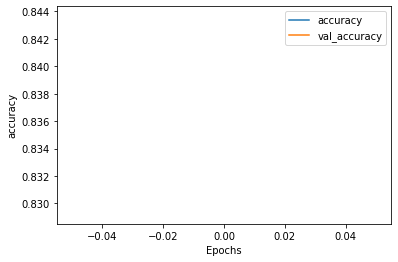

In [11]:
plot_graphs(history_single, 'accuracy')

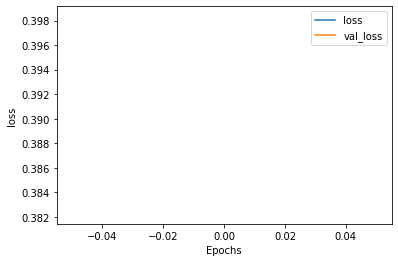

In [12]:
plot_graphs(history_single, 'loss')

# Multiple Layer LSTM

In [9]:
model_Multiple = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_Multiple.summary()
model_Multiple.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
NUM_EPOCHS = 1
history_Multiple = model_Multiple.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________
391/391 [==============================] - 1824s 5s/step - loss: 0.5996 - accuracy: 0.6661 - val_loss: 0.5159 - va

In [ ]:
plot_graphs(history_Multiple, 'accuracy')

In [ ]:
plot_graphs(history_Multiple, 'loss')

# Multiple Layer GRU

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])